In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import  MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/task/SCAM/spam.csv', encoding='latin-1')

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/task/SCAM/combine_csv.csv', encoding='latin-1')
df = pd.read_csv('/content/drive/MyDrive/task/SCAM/combine_csv2.csv', encoding='latin-1')


In [ ]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...
9218,spam,Congratulations! This is John from Chase. Youâ...
9219,spam,This is an urgent notice from CitiBank. If you...
9220,spam,"Dear Customer, this is John from Chase. Weâv..."


In [ ]:
df['message_len'] = df['text'].apply(lambda x:len(x.split(' ')))

In [ ]:
df


,target,text,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...,36
9218,spam,Congratulations! This is John from Chase. Youâ...,32
9219,spam,This is an urgent notice from CitiBank. If you...,31
9220,spam,"Dear Customer, this is John from Chase. Weâv...",24


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
balance_count = df.groupby('target').count()
balance_count

,text,message_len
target,,
ham,5080,5080
spam,4142,4142


# DATA PREPROCESSING

# CLEAN CORPUS

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['message_clean'] = df['text'].apply(clean_text)

df

,target,text,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...,36,this is the fraud department of bank of americ...
9218,spam,Congratulations! This is John from Chase. Youâ...,32,congratulations this is john from chase youâ...
9219,spam,This is an urgent notice from CitiBank. If you...,31,this is an urgent notice from citibank if you ...
9220,spam,"Dear Customer, this is John from Chase. Weâv...",24,dear customer this is john from chase weâve ...


# STOPWORD

In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['message_clean'] = df['message_clean'].apply(remove_stopwords)
df.head()

,target,text,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goes usf lives around though


In [ ]:
df

,target,text,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goes usf lives around though
...,...,...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...,36,fraud department bank america suspect someone ...
9218,spam,Congratulations! This is John from Chase. Youâ...,32,congratulations john chase youâve cash rewar...
9219,spam,This is an urgent notice from CitiBank. If you...,31,urgent notice citibank donât act account per...
9220,spam,"Dear Customer, this is John from Chase. Weâv...",24,dear customer john chase weâve detected tra...


# STEMMING

In [ ]:
stemmer = nltk.SnowballStemmer("english")

# def stemm_text(tokens):
#     return [stemmer.stem(word) for word in tokens]

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [ ]:
df['message_clean'] = df['message_clean'].apply(stemm_text)
df.head()

,target,text,message_len,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though


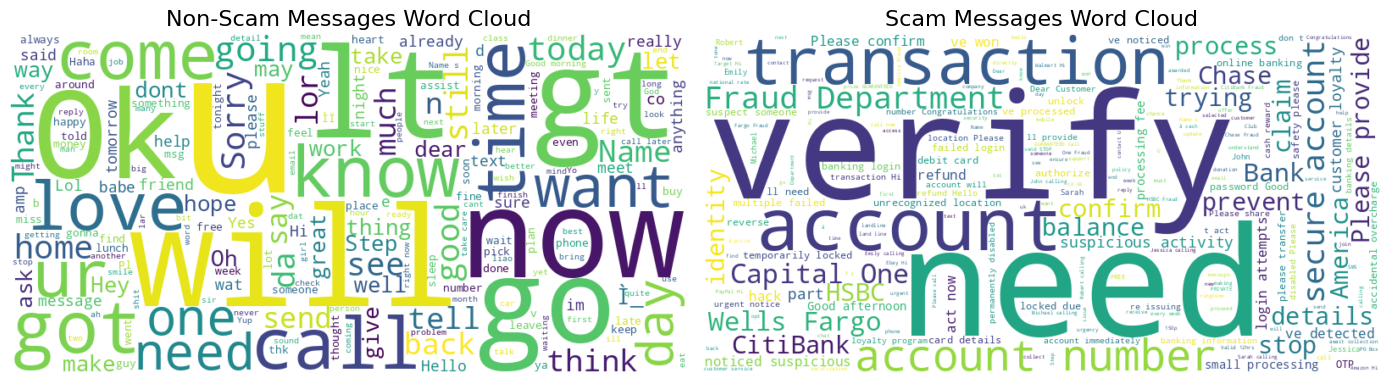

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/combine_csv2.csv')

# Generate separate word clouds for "ham" and "spam"
ham_text = " ".join(data[data['target'] == 'ham']['text'])
spam_text = " ".join(data[data['target'] == 'spam']['text'])

# Generate word clouds
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word clouds side by side
plt.figure(figsize=(14, 7))

# Ham word cloud
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Non-Scam Messages Word Cloud", fontsize=16)

# Spam word cloud
plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Scam Messages Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

In [3]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...
9218,spam,Congratulations! This is John from Chase. You’...
9219,spam,This is an urgent notice from CitiBank. If you...
9220,spam,"Dear Customer, this is John from Chase. We’ve ..."


# TARGET ENCODING

In [ ]:
le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df

,target,text,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though,0


In [ ]:
df

,target,text,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though,0
...,...,...,...,...,...
9217,spam,This is the Fraud Department of Bank of Americ...,36,fraud depart bank america suspect someon tri h...,1
9218,spam,Congratulations! This is John from Chase. Youâ...,32,congratul john chase youâv cash reward part ...,1
9219,spam,This is an urgent notice from CitiBank. If you...,31,urgent notic citibank donât act account perm...,1
9220,spam,"Dear Customer, this is John from Chase. Weâv...",24,dear custom john chase weâv detect transact...,1


# DATA PARTITION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message_clean'],df['target_encoded'], test_size=0.2, random_state=42)

In [ ]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

7377 7377
1845 1845


# TF-IDF vectorization
use to convert text to numerical value to let Machine understand


In [ ]:
# # Custom tokenizer function to pass to TfidfVectorizer
# def identity_tokenizer(text):
#     return text

# # Initialize a TF-IDF Vectorizer with the custom tokenizer
# vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', min_df=50, max_features=10000)

# # Fit and transform using the tokenized data
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=50,max_features=10000)

# Fit the vectorizer on the training data only and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
df.head()

,target,text,message_len,message_clean,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,6,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entri wkli comp win fa cup final tkts m...,1
3,ham,U dun say so early hor... U c already then say...,11,dun say earli hor alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think goe usf live around though,0


In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model on the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the training set and test set
train_predictions = nb_classifier.predict(X_train_tfidf)
test_predictions = nb_classifier.predict(X_test_tfidf)

# Calculate the accuracy on the training set and test set
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training score:", train_accuracy)
print("Testing score:", test_accuracy)

# Additional: Classification report for more insights
print(classification_report(y_test, test_predictions))

Training score: 0.9206994713298089
Testing score: 0.9132791327913279
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1010
           1       0.96      0.85      0.90       835

    accuracy                           0.91      1845
   macro avg       0.92      0.91      0.91      1845
weighted avg       0.92      0.91      0.91      1845



In [ ]:
import pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)


with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


# TESTING

In [ ]:

# Load the TfidfVectorizer
with open('/content/drive/MyDrive/task/SCAM/tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Load the Naive Bayes model
with open('/content/drive/MyDrive/task/SCAM/naive_bayes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# new_sentence = "Hello, this is [fake name] from [Bank Name] Fraud Department. We’ve noticed suspicious activity on your account. Did you authorize a $1,000 transaction to [Fake Merchant] today?"
# new_sentence = "Hi, this is [fake name] from [Bank Name]. Your account has been temporarily locked due to multiple failed login attempts. To unlock it, I need you to confirm your account number and password."
# new_sentence = "Good afternoon, this is [fake name] calling from [Bank Name]. We’ve processed an accidental overcharge of $300 to your account. To reverse it, I’ll need to verify your debit card details and your online banking login."
# new_sentemce = "This is an urgent notice from [Bank Name]. If you don’t act now, your account will be permanently disabled. Please provide your details so we can verify your identity and prevent this."
# new_sentence = "Hi this from paynet , congratulation you won a prize for RM50000 , we have sent you an OTP code , please reply us the code so that we can transfer the money to your bank account"
# new_sentence = "Oi robert , how are you, please help me take attendence tommorow"
new_sentence = "i want to bring four of you to japan, but you need to transfer me RM1000 per pack to my Hong leong bank account , the account number is 338662829"
# new_sentence = " Hi aika, this is John from HSBC. We have detected a $1500 transaction from an unrecognized location. Please share your OTP to stop the transaction."
# new_sentence = " Hi minhwei , i am from paynet , i am here to ask you wether are you free on tuesday , can we have a interview session with you."
# new_sentence = " hey congratulation , you have win a 3day 2 night japan trip , this trip has cost RM50000.Plese send me your bank account number to make sure your identity information"




def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

preprocessed_sentence = clean_text(new_sentence)

# stop_words = stopwords.words('english')
# more_stopwords = ['u', 'im', 'c']
# stop_words = stop_words + more_stopwords

# def remove_stopwords(text):
#     text = ' '.join(word for word in text.split(' ') if word not in stop_words)
#     return text

# preprocessed_sentence = remove_stopwords(preprocessed_sentence)

# stemmer = nltk.SnowballStemmer("english")

# def stemm_text(text):
#     text = ' '.join(stemmer.stem(word) for word in text.split(' '))
#     return text

# preprocessed_sentence = stemm_text(preprocessed_sentence)


In [ ]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

preprocessed_sentence = remove_stopwords(preprocessed_sentence)
preprocessed_sentence

'want bring four japan need transfer  per pack hong leong bank account  account number '

In [ ]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

preprocessed_sentence = stemm_text(preprocessed_sentence)
preprocessed_sentence

'want bring four japan need transfer  per pack hong leong bank account  account number '

In [ ]:
sentence_tfidf = loaded_vectorizer.transform([preprocessed_sentence])


In [ ]:
predicted_label = loaded_model.predict(sentence_tfidf)

# Output the prediction
if predicted_label[0] == 1:
    print("Predicted label: 1 (SCAM)")
elif predicted_label[0] == 0:
    print("Predicted label: 0 (Not SCAM)")
else:
    print("Unexpected label:", predicted_label[0])


Predicted label: 1 (SCAM)


# Another call transcript dataset







In [ ]:

c_df = pd.read_csv('/content/drive/MyDrive/task/SCAM/BETTER30.csv', encoding='latin-1')



In [ ]:
c_df

,CONVERSATION_ID,CONVERSATION_STEP,TEXT,CONTEXT,LABEL,FEATURES,ANNOTATIONS
0,6,1,"Good morning, this is [Your Name]'s personal a...",Standard opening exchange,neutral,NaN,NaN
1,6,2,"Hello, my name is Jamie. I'm interested in vol...",Encourages the caller's interest,neutral,"welcoming, positive_tone",NaN
2,6,3,"Yes, I'm really passionate about environmental...",Reinforces anyone can volunteer,neutral,inclusive,NaN
3,6,4,"Great, how do I sign up, and where can I find ...",Demonstrates flexibility,neutral,"helpful_tone, offers_options",NaN
4,6,5,"Could you send me the link, please? And my ema...",Fulfills caller's request quickly,neutral,prompt_action,NaN
...,...,...,...,...,...,...,...
645,68,5,Would it be possible to receive some literatur...,"""Assistant requests official documentation fo...",scam_response,"""literature_request","decision_making_review"""
646,68,6,We can certainly provide information on our wo...,"""Scammer stresses the urgency of the situation.""",scam,"""immediate_action_urgency","urgency_stress"""
647,68,7,"I understand the urgency, but our policy is to...","""Assistant reiterates the policy on verifying...",scam_response,"""contribution_policy_reiteration","information_for_review_request"""
648,68,8,I'll do my best to get you the information qui...,"""Scammer promises to send information and hig...",scam,"""information_sending_promise","support_impact_highlight"""


In [ ]:
c_df['LABEL'].unique()


array(['neutral', 'slightly_suspicious', 'suspicious',
       'highly_suspicious', 'legitimate', 'scam',
       'standard_opening, identification_request', 'polite_ending',
       'potential_scam', ' neutral', ' legitimate', ' scam',
       ' scam_response', ' dismissing official protocols"',
       ' emphasizing security and compliance"',
       ' ready for further engagement"',
       ' suggesting a dangerous situation"', 'Scam',
       ' adhering to protocols"', ' citing urgency"', 'scam_response'],
      dtype=object)

In [ ]:
c_df.drop(columns=['CONVERSATION_ID'], inplace=True)
c_df.drop(columns=['FEATURES'], inplace=True)
c_df.drop(columns=['ANNOTATIONS'], inplace=True)
c_df.drop(columns=['CONTEXT'], inplace=True)
c_df.drop(columns=['CONVERSATION_STEP'], inplace=True)




c_df

,TEXT,LABEL
0,"Good morning, this is [Your Name]'s personal a...",neutral
1,"Hello, my name is Jamie. I'm interested in vol...",neutral
2,"Yes, I'm really passionate about environmental...",neutral
3,"Great, how do I sign up, and where can I find ...",neutral
4,"Could you send me the link, please? And my ema...",neutral
...,...,...
645,Would it be possible to receive some literatur...,scam_response
646,We can certainly provide information on our wo...,scam
647,"I understand the urgency, but our policy is to...",scam_response
648,I'll do my best to get you the information qui...,scam


In [ ]:
c_df['LABEL'] = c_df['LABEL'].str.strip().str.lower()

In [ ]:
scam_labels = [
    'scam', 'suspicious', 'highly_suspicious', 'slightly_suspicious', 'potential_scam',
    'scam_response', 'citing urgency"', 'suggesting a dangerous situation"', 'dismissing official protocols"',
    'scam_response'
]
non_scam_labels = [
    'neutral', 'legitimate', 'standard_opening, identification_request', 'polite_ending',
    'adhering to protocols"', 'emphasizing security and compliance"', 'ready for further engagement"'
]


In [ ]:
def classify_label(label):
    if label in scam_labels:
        return 'spam'
    elif label in non_scam_labels:
        return 'ham'
    else:
        return label  # For any labels not categorized

In [ ]:
c_df['CATEGORY'] = c_df['LABEL'].apply(classify_label)

In [ ]:
c_df['CATEGORY'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
c_df.drop(columns=['LABEL'], inplace=True)

In [ ]:
c_df

,TEXT,CATEGORY
0,"Good morning, this is [Your Name]'s personal a...",ham
1,"Hello, my name is Jamie. I'm interested in vol...",ham
2,"Yes, I'm really passionate about environmental...",ham
3,"Great, how do I sign up, and where can I find ...",ham
4,"Could you send me the link, please? And my ema...",ham
...,...,...
645,Would it be possible to receive some literatur...,spam
646,We can certainly provide information on our wo...,spam
647,"I understand the urgency, but our policy is to...",spam
648,I'll do my best to get you the information qui...,spam


In [ ]:
# prompt: Using dataframe c_df: rename TEXT to text , Category to target

# Rename the columns
c_df = c_df.rename(columns={"TEXT": "text", "CATEGORY": "target"})
c_df


,text,target
0,"Good morning, this is [Your Name]'s personal a...",ham
1,"Hello, my name is Jamie. I'm interested in vol...",ham
2,"Yes, I'm really passionate about environmental...",ham
3,"Great, how do I sign up, and where can I find ...",ham
4,"Could you send me the link, please? And my ema...",ham
...,...,...
645,Would it be possible to receive some literatur...,spam
646,We can certainly provide information on our wo...,spam
647,"I understand the urgency, but our policy is to...",spam
648,I'll do my best to get you the information qui...,spam


In [ ]:
# prompt: Using dataframe c_df: make text at the second column  , target at the first column

# Create a copy to avoid modifying the original DataFrame
new_c_df = c_df.copy()

# Swap the 'text' and 'target' columns
new_c_df = new_c_df[['target', 'text']]

# Display the updated DataFrame (optional)
new_c_df


,target,text
0,ham,"Good morning, this is [Your Name]'s personal a..."
1,ham,"Hello, my name is Jamie. I'm interested in vol..."
2,ham,"Yes, I'm really passionate about environmental..."
3,ham,"Great, how do I sign up, and where can I find ..."
4,ham,"Could you send me the link, please? And my ema..."
...,...,...
645,spam,Would it be possible to receive some literatur...
646,spam,We can certainly provide information on our wo...
647,spam,"I understand the urgency, but our policy is to..."
648,spam,I'll do my best to get you the information qui...


In [ ]:
vertical_concat = pd.concat([df, new_c_df], axis=0, ignore_index=True) # concatenating along rows

vertical_concat.to_csv('combine_csv.csv', index=False)

In [ ]:
vertical_concat['target'].unique()

array(['ham', 'spam'], dtype=object)